<a href="https://colab.research.google.com/github/lilianabs/learning-pytorch/blob/main/Pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


In [15]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [16]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [17]:
y= y.view(y.shape[0], 1)

In [18]:
n_samples, n_features = X.shape

In [19]:
# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [20]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(X)
  loss = criterion(y_pred, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4433.6895
epoch: 20, loss = 3307.5857
epoch: 30, loss = 2492.5791
epoch: 40, loss = 1902.1084
epoch: 50, loss = 1473.8979
epoch: 60, loss = 1163.0800
epoch: 70, loss = 937.2857
epoch: 80, loss = 773.1313
epoch: 90, loss = 653.7068
epoch: 100, loss = 566.7672


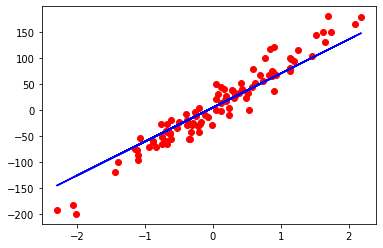

In [22]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
